# Report handler examples

Install leakpro as ``` pip install -e /path/to/leakpro ```

### Synthetic examples

In [1]:
import os
import sys

import pandas as pd

sys.path.append("../..")

from leakpro.synthetic_data_attacks import plots
from leakpro.synthetic_data_attacks.anomalies import return_anomalies
from leakpro.synthetic_data_attacks.inference_utils import inference_risk_evaluation
from leakpro.synthetic_data_attacks.linkability_utils import linkability_risk_evaluation
from leakpro.synthetic_data_attacks.singling_out_utils import singling_out_risk_evaluation
# from leakpro.metrics.attack_result import SyntheticResult

#Get ori and syn
n_samples = 100
DATA_PATH = "../synthetic_data/datasets/"
ori = pd.read_csv(os.path.join(DATA_PATH, "adults_ori.csv"), nrows=n_samples)
syn = pd.read_csv(os.path.join(DATA_PATH, "adults_syn.csv"), nrows=n_samples)

### Get anomalies of synthetic data

In [2]:
syn_anom = return_anomalies(df=syn, n_estimators=1000, n_jobs=-1, verbose=True)
print("Syn anom shape",syn_anom.shape)

[Parallel(n_jobs=64)]: Using backend ThreadingBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done   2 out of  64 | elapsed:    0.9s remaining:   28.1s
[Parallel(n_jobs=64)]: Done  64 out of  64 | elapsed:    4.1s finished


Unique predictions (array([-1,  1]), array([ 2, 98]))
Syn anom shape (2, 14)


In [3]:
sin_out_res = singling_out_risk_evaluation(
    dataset = "adults",
    ori = ori,
    syn = syn_anom,
    n_attacks = syn_anom.shape[0]
)
# save_path = sin_out_res.save()
# print(save_path)

In [4]:
# from leakpro.synthetic_data_attacks.singling_out_utils import SinglingOutResults
# import json

# with open("../../leakpro_output/results/singling_out/singling_out_n_cols_all_adults/data.json") as f:
#     data = json.load(f)
#     syn_loaded = SinglingOutResults.load(data=data)
    
# syn_loaded.plot()

In [5]:
from leakpro.reporting.report_handler import ReportHandler
report_handler = ReportHandler()

report_handler.save_results(attack_name="singling_out", result_data=sin_out_res)

2024-11-20 00:09:42,566 INFO     Initializing report handler...
2024-11-20 00:09:42,567 INFO     report_dir set to: ../../leakpro_output/results
2024-11-20 00:09:42,569 INFO     Saving results for singling_out


../../leakpro_output/results


<Figure size 3300x1200 with 0 Axes>

In [6]:
report_handler.load_results()
report_handler.create_results_all()

report_handler.create_report()

2024-11-19 23:38:04,520 INFO     No results of type GIAResults found.


../../leakpro_output/results


2024-11-19 23:38:14,966 INFO     PDF compiled


<Figure size 640x480 with 0 Axes>

<Figure size 1100x400 with 0 Axes>

### Singling-out risk analysis, Linkability riks analysis with anomalies and Inference risk, worst and base case

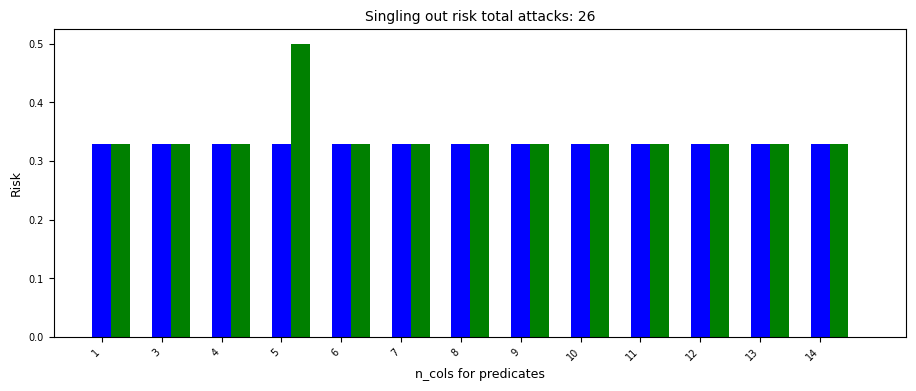

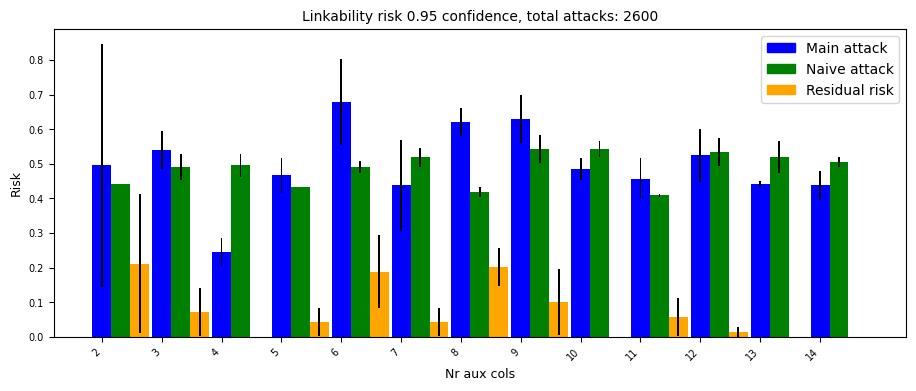

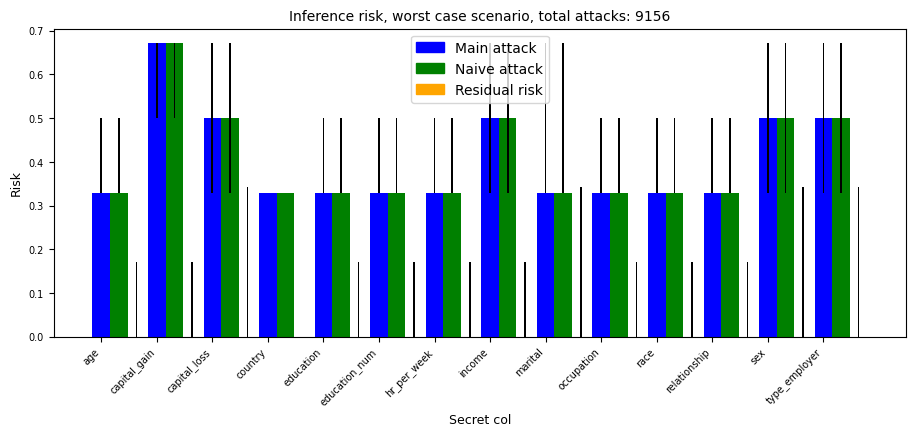

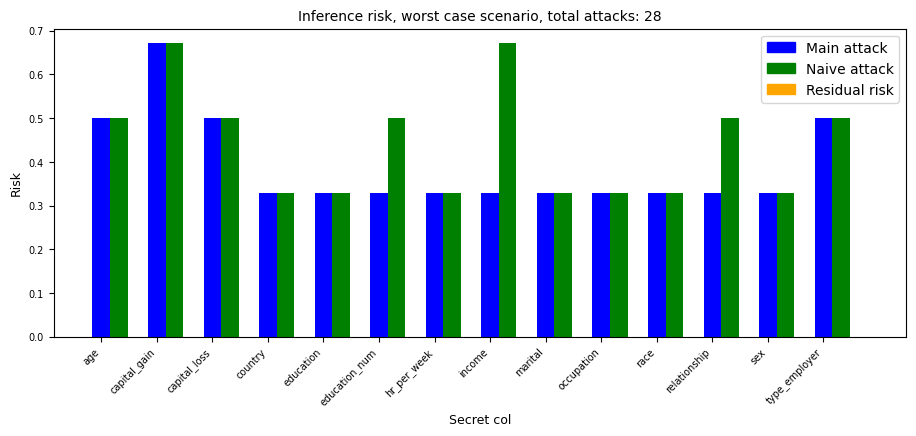

In [10]:
# Singling-out
sin_out_res = singling_out_risk_evaluation(
    dataset = "adults",
    ori = ori,
    syn = syn_anom,
    n_attacks = syn_anom.shape[0]
)
SyntheticResult.plot(res=sin_out_res,
                    high_res_flag=False,
                    save=True,
                    save_path="./outputs",
                    save_name="Singling-out"
                    )

# Linkability
link_res = linkability_risk_evaluation(
    dataset = "adults",
    ori = ori,
    syn = syn_anom,
    n_samples = syn_anom.shape[0],
    n_attacks = 100
)
SyntheticResult.plot(res=link_res,
                    high_res_flag=False,
                    save=True,
                    save_path="./outputs",
                    save_name="Linkability"
                    )

# Inference risk, base case
inf_res = inference_risk_evaluation(
    dataset = "adults",
    ori = ori,
    syn = syn_anom,
    worst_case_flag = False,
    n_attacks = syn_anom.shape[0]
)
SyntheticResult.plot(res=inf_res,
                    high_res_flag=False,
                    case_flag="base",
                    save=True,
                    save_path="./outputs",
                    save_name="Inference_base_case"
                    )

# Inference risk, worst case
inf_res_worst = inference_risk_evaluation(
    dataset = "adults",
    ori = ori,
    syn = syn_anom,
    worst_case_flag = True,
    n_attacks = syn_anom.shape[0]
)
SyntheticResult.plot(res=inf_res_worst,
                    high_res_flag=False,
                    case_flag="worst",
                    save=True,
                    save_path="./outputs",
                    save_name="Inference_worst_case"
                    )

## Save and store results

In [11]:
path = "../../leakpro_output"
if not os.path.exists(path):
    os.makedirs(path)
    
from leakpro.reporting.report_handler import ReportHandler

reporthandler = ReportHandler(
    report_dir=path,
    )

reporthandler.save_results(
    attack_name="synthetic_inference",
    result_data=inf_res,
    config={"case": "base"}
    )


TypeError: ReportHandler.__init__() missing 1 required positional argument: 'logger'